# Diabetes Classification :

## Librairies

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #Pour le visuel de la Confusion matrix

import plotly.express as px #plot

# Classifiers :
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Metrics :
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

#Selection de modèle :
from sklearn.model_selection import GridSearchCV

#Clustering :
from sklearn.cluster import KMeans

#Scaling :
from sklearn.preprocessing import StandardScaler

#ignore warning messages :
import warnings
warnings.filterwarnings('ignore')

### Get Data  :

In the dataset, we only have women, aged at least 21 years, from the Pima people. We have 8 features in total :

    - Pregnancies : Number of pregnancies.
    
    - Glucose : 2h after ingesting sugar in the tolerance test.
        
    - BloodPressure : Considered high at 90+ and low at 60-
    
    - SkinThickness : Measured at the triceps; higher values may indicate cardiovascular risk
    
    - Insulin : Insulin level.
    
    - BMI : Body Mass Index
    
    - DiabetesPedigreeFunction : Likelihood of being diabetic
    
    - Age
    
Data : https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [21]:
data=pd.read_csv('diabetes.csv')

## Visualization :

In [22]:
print(data.head(),"\n")
print("Data shape :", data.shape)
data_true=data[data["Outcome"]==1]
data_false=data[data["Outcome"]==0]
print("Number of diabetic :", len(data_true))
print("Proportion of diabetic :", round(len(data_true)/len(data)*100),'%')

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1   

Data shape : (768, 9)
Number of diabetic : 268
Proportion of diabetic : 35 %


- We can already see some anomalies like insulin, bloodpressure and skinthickness at 0. Missing data ??

### Missing data :

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
print("Percentage with 0 :")
print('Insulin : ', round(len(data[data["Insulin"]==0])/len(data)*100),"%")
print('SkinThickness : ', round(len(data[data["SkinThickness"]==0])/len(data)*100),"%")
print('BloodPressure : ', round(len(data[data["BloodPressure"]==0])/len(data)*100),"%")
print('Glucose : ', round(len(data[data["Glucose"]==0])/len(data)*100),"%")
print('BMI : ', round(len(data[data["BMI"]==0])/len(data)*100),"%")

Percentage with 0 :
Insulin :  49 %
SkinThickness :  30 %
BloodPressure :  5 %
Glucose :  1 %
BMI :  1 %


In [25]:
donnees_manquantes=data[(data["Glucose"]==0) | (data["Insulin"]==0) | (data["BMI"]==0) | (data["BloodPressure"]==0) | (data["SkinThickness"]==0)]
print("Number of individuals with at least one missing value :", len(donnees_manquantes))
print("Proportion of missing values :", round(len(donnees_manquantes)/len(data)*100),"%")
print("Proportion of diabetic in missing values :", round(len(donnees_manquantes[donnees_manquantes["Outcome"]==1])/len(donnees_manquantes)*100),"%")

Number of individuals with at least one missing value : 376
Proportion of missing values : 49 %
Proportion of diabetic in missing values : 37 %


In [26]:
del donnees_manquantes

In [27]:
# Replace 0 values with NaN for easier imputation
data_imputed = data.copy()
data_imputed[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = data_imputed[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)

# Impute with the mean by category :
data_imputed["Glucose"] = data_imputed.groupby("Outcome")["Glucose"].transform(lambda x: x.fillna(x.mean()))
data_imputed["BloodPressure"] = data_imputed.groupby("Outcome")["BloodPressure"].transform(lambda x: x.fillna(x.mean()))
data_imputed["SkinThickness"] = data_imputed.groupby("Outcome")["SkinThickness"].transform(lambda x: x.fillna(x.mean()))
data_imputed["Insulin"] = data_imputed.groupby("Outcome")["Insulin"].transform(lambda x: x.fillna(x.mean()))
data_imputed["BMI"] = data_imputed.groupby("Outcome")["BMI"].transform(lambda x: x.fillna(x.mean()))

# Update the original data DataFrame with the imputed values
data = data_imputed.copy()

In [28]:
del data_imputed

### Correlation :

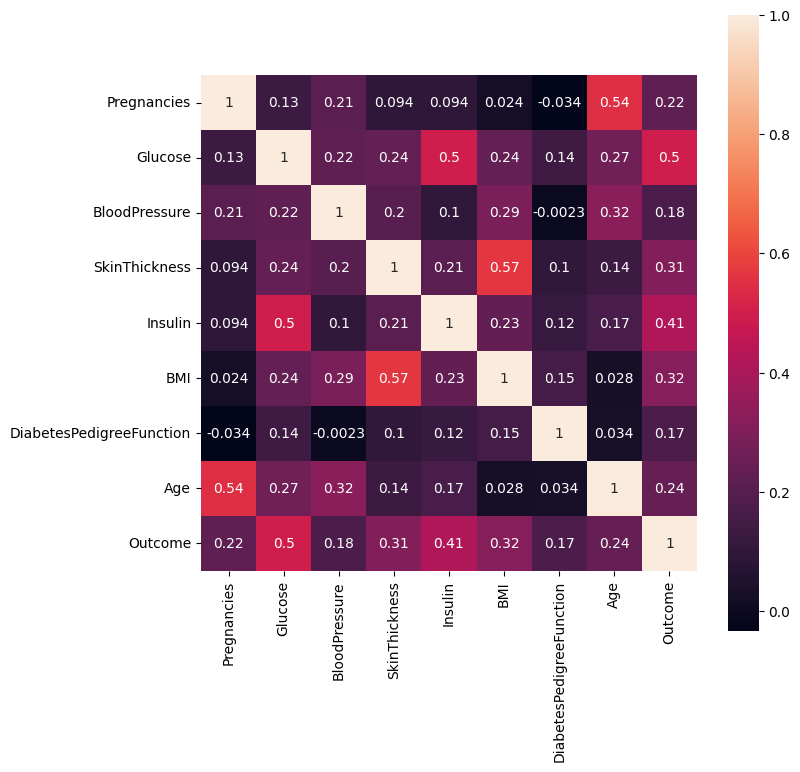

In [29]:
plt.subplots(figsize=(8,8))
corrmat=data.corr()
sns.heatmap(corrmat,vmax=1,square=True,annot=True)
plt.show()

The biggest correlation are : Age/Pregnancies, BMI/SkinThickness, Glucose/Insulin, Glucose/Outcome and Insulin/Outcome.

### Pairplot :

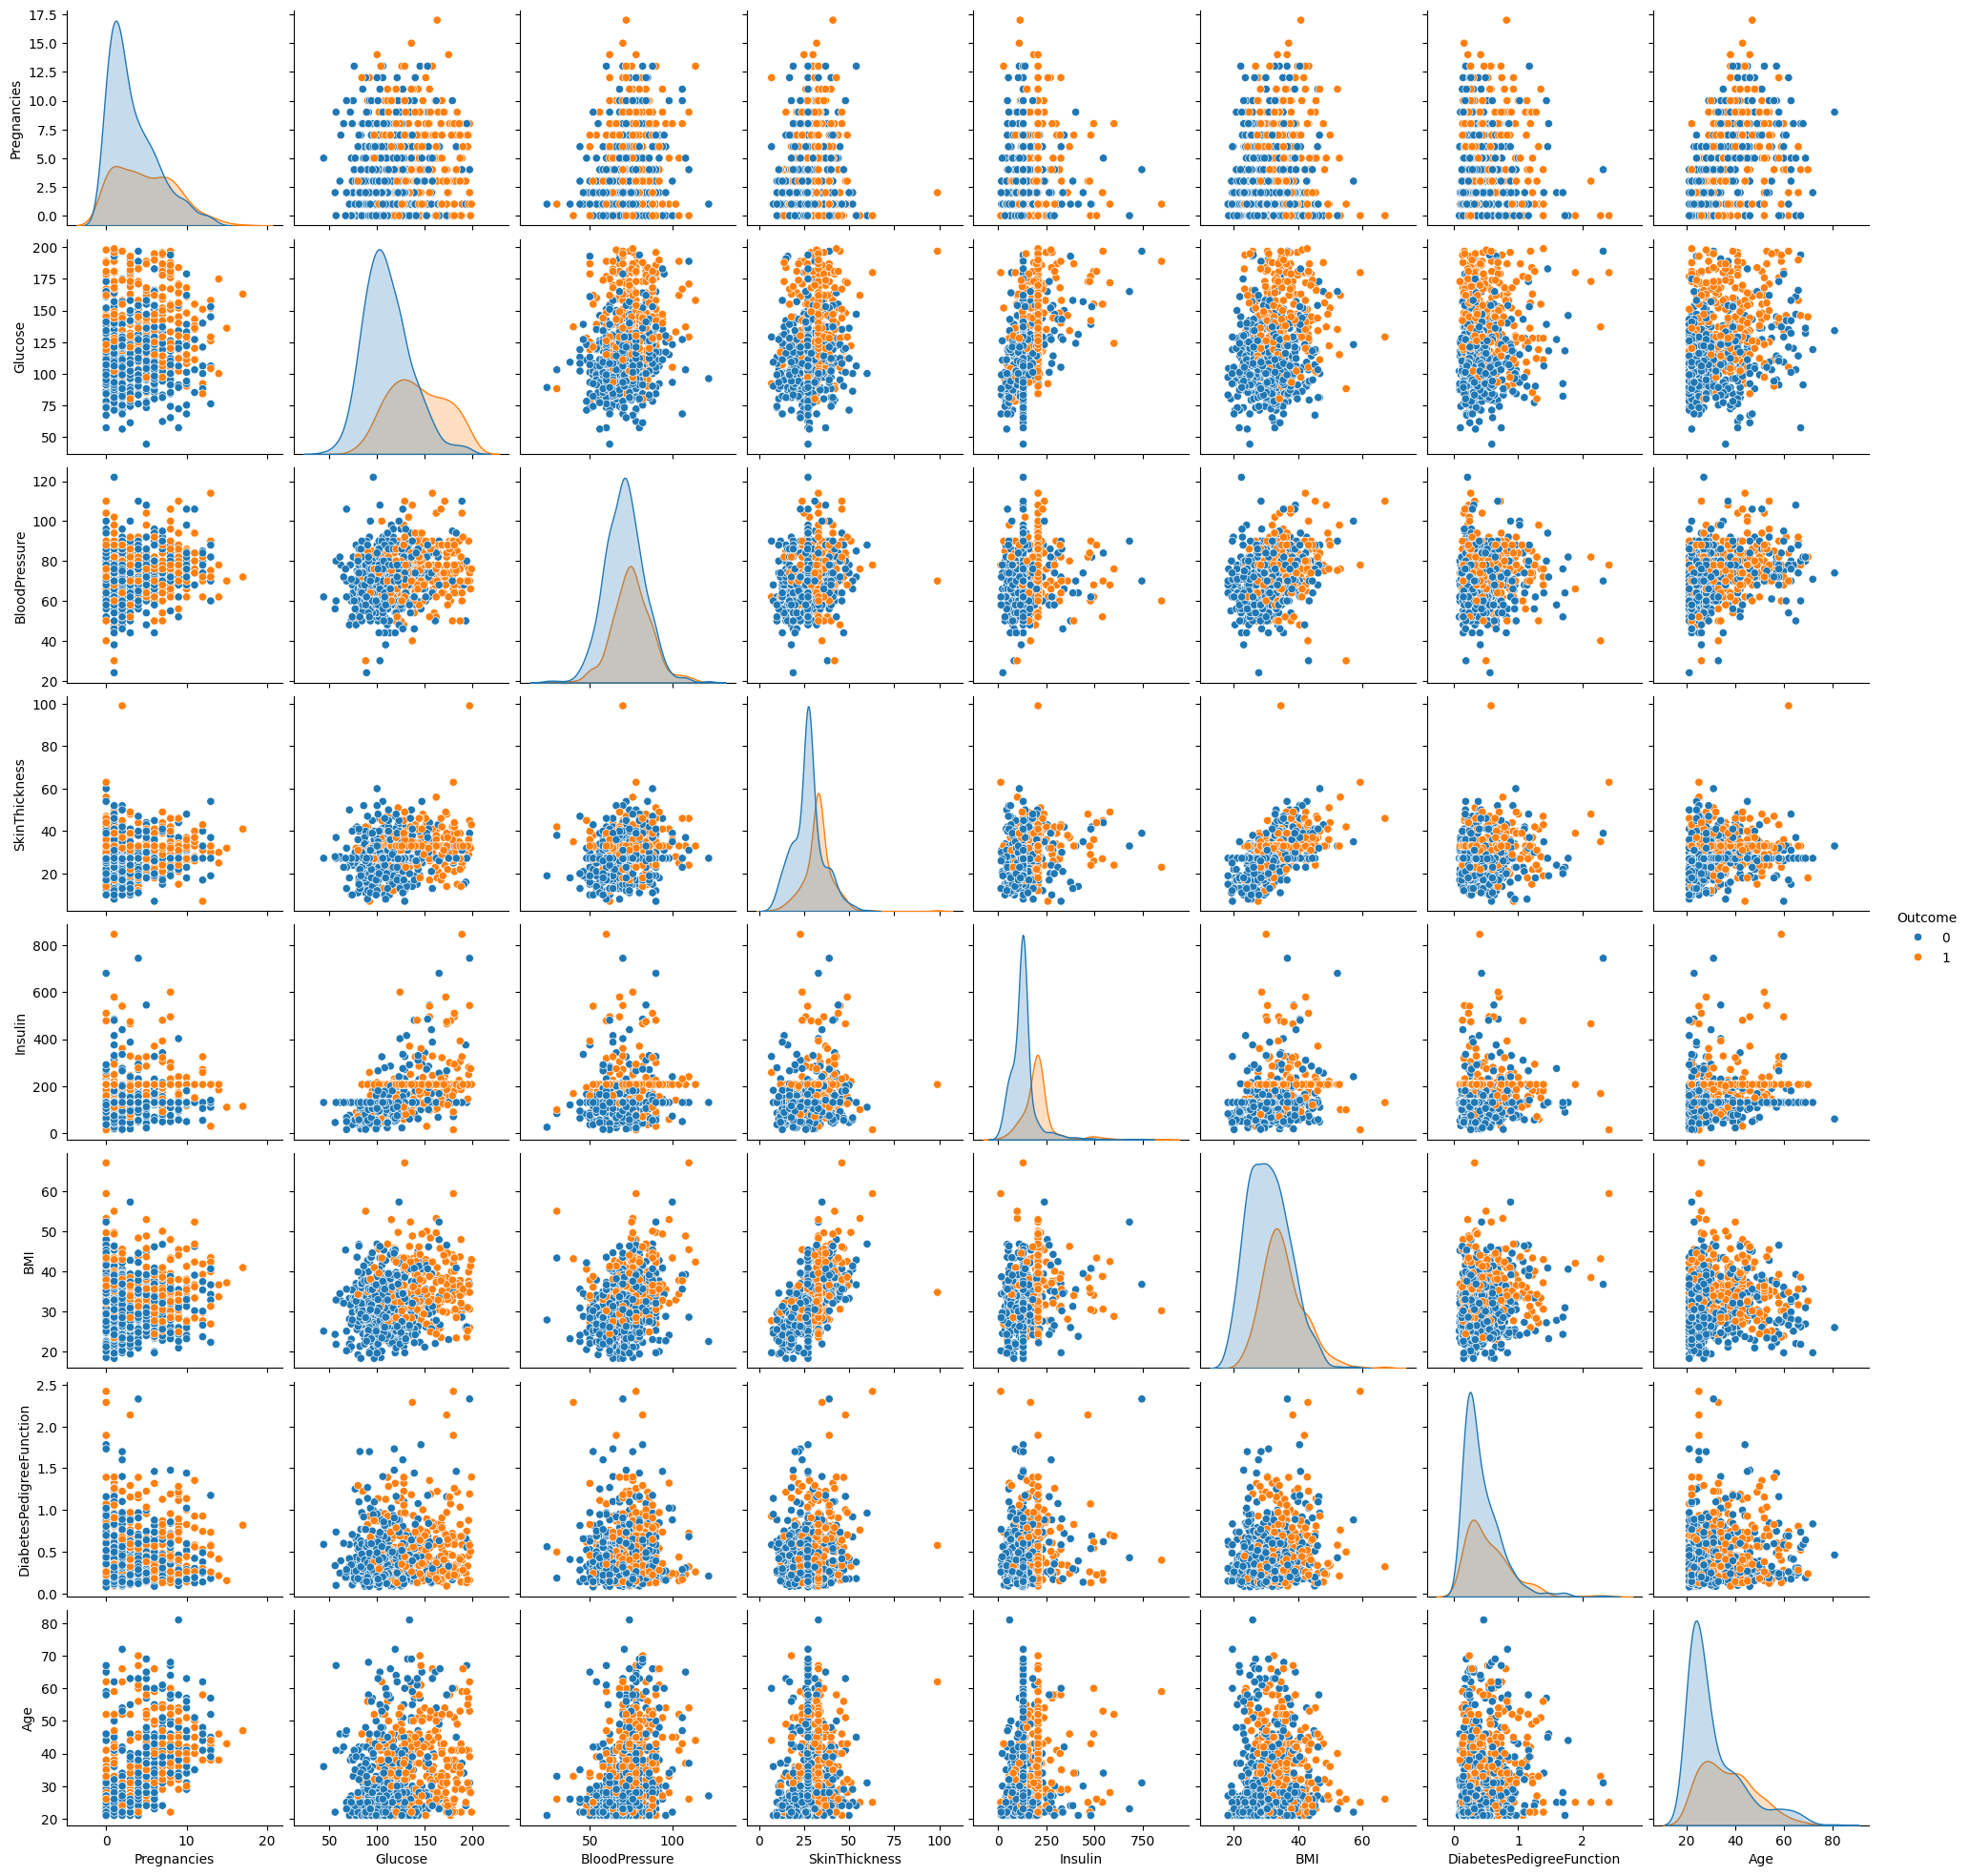

In [30]:
sns.pairplot(data,hue="Outcome",vars=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin",
                                                       "BMI","DiabetesPedigreeFunction","Age"])

### ACP :

In [31]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

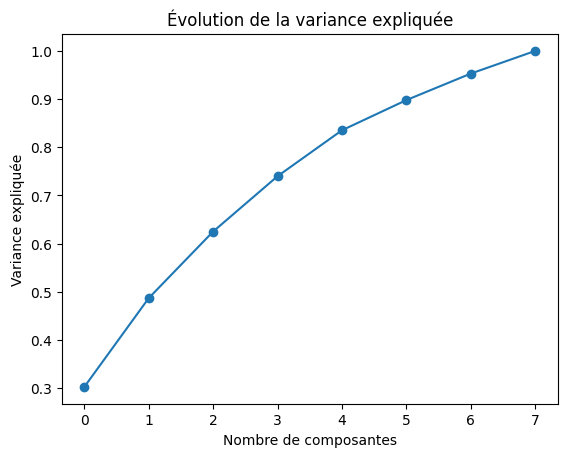

In [32]:
#Library for ACP :
from sklearn.decomposition import PCA

#Normalization :
ss = StandardScaler()
X_std = ss.fit_transform(X)
acp=PCA().fit(X_std)

plt.plot(np.cumsum(acp.explained_variance_ratio_))
plt.scatter(np.arange(0,len(acp.explained_variance_ratio_)),np.cumsum(acp.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée')
plt.title('Évolution de la variance expliquée')
plt.show()

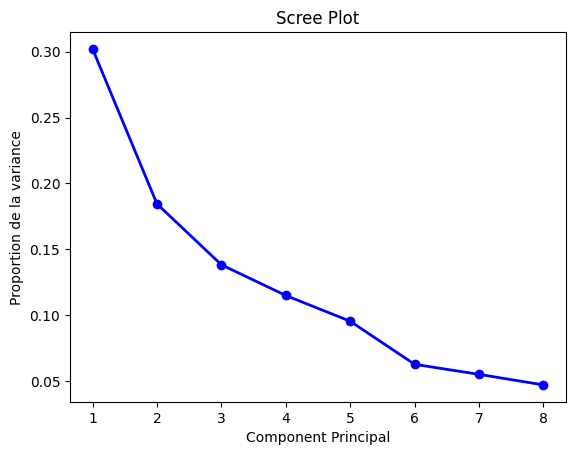

In [33]:
PCA_values = np.arange(acp.n_components_) + 1
plt.plot(PCA_values, acp.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Component Principal')
plt.ylabel('Proportion de la variance')
plt.show()

PCA is not necessary here, the explained variance atteigned by the first components is not really high and 8 features is at first not high too.

## Clustering

Here we'll try to see if a clustering (non supervised algorithm) can find the two expected category (diabetic or not) when we're asking it to classify our data in two group using a Kmeans.

In [36]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(X_std)

labels = kmeans.labels_
labels_vrai=sum(y==labels)
labels_faux=len(labels)-labels_vrai
print("Results : %d on %d individuals are correctly classified" % (labels_vrai, y.size))
print("Proportion : {:.2%}".format(labels_vrai/len(y)))

Results : 567 on 768 individuals are correctly classified
Proportion : 73.83%


With 74% of the individuals correctly separated it could be good to look at this more closely and maybe use another clustering method like DBSCAN to see if we can have even better results.

## Modelisation :

### Split train/test :

In [38]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

# Split 80%/20%
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,random_state=42)
y_true = np.array(data["Outcome"])

# Normalization :
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

X_train.shape, X_test.shape

((614, 8), (154, 8))

### Baseline :

Baseline accuracy : 64.29%
Error on class 1 : 100.00%


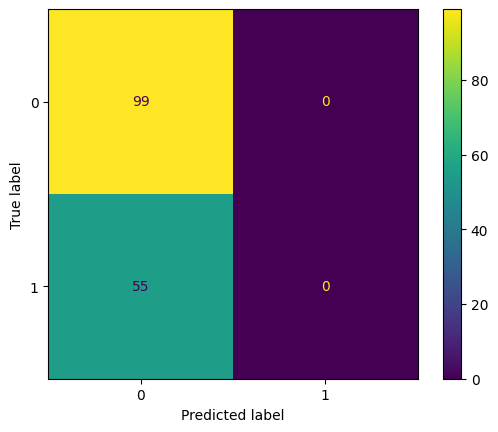

In [48]:
score_baseline=(len(y_test)-sum(y_test))/len(y_test) # Here the accuracy is just the number of non-diabetic because we always predict "not diabetic"
print("Baseline accuracy : {:.2%}".format(score_baseline))
y_pred = 0*y_test
cm=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
print('Error on class 1 : {:.2%}'.format(1)) # We never predict 1

### K-NN :

Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best parameters : {'n_neighbors': np.int64(19)}
Best accuracy on train : 83.23%
Accuracy on test : 85.71%
Error on class 1 : 21.82%


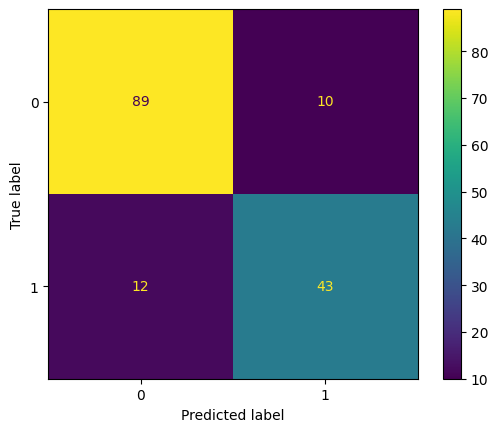

In [42]:
# GridSearch with a 10 fold cross-validation :
grid_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid={'n_neighbors':np.arange(2,30,step=1)},
                  scoring="accuracy",cv=10,verbose=1)
grid_knn.fit(X_train_std,y_train)
print("Best parameters :",grid_knn.best_params_)

best_knn=grid_knn.best_score_
print("Best accuracy on train : {:.2%}".format(best_knn))

score_knn=grid_knn.score(X_test_std,y_test)
print("Accuracy on test : {:.2%}".format(score_knn))

# Confusion Matrix :
y_pred=grid_knn.predict(X_test_std)
cm=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

mv_class_knn=cm[1,0]/(cm[1,0]+cm[1,1]) #FN/(FN+TP)
print('Error on class 1 : {:.2%}'.format(mv_class_knn))
res_knn=precision_recall_fscore_support(y_test,y_pred,average='weighted')[0:3]

### Logistic Regression :

Fitting 10 folds for each of 177 candidates, totalling 1770 fits
Best parameters : {'C': np.float64(0.5), 'solver': 'lbfgs'}
Best accuracy on train : 78.17%
Accuracy on test : 79.22%
Error on class 1 : 34.55%


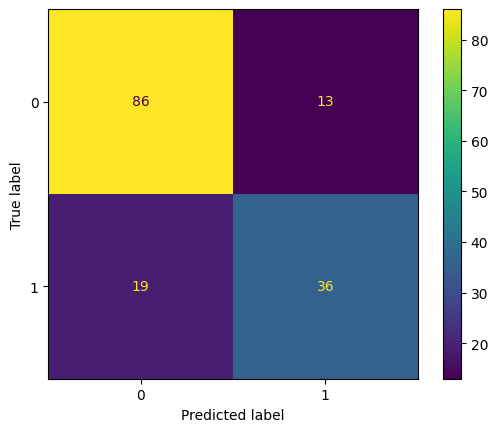

In [43]:
# GridSearch with a 10 fold cross-validation :
grid_lr=GridSearchCV(estimator=LogisticRegression(max_iter=5000),param_grid={'C':np.arange(0.5,30,step=0.5),'solver':['newton-cg','lbfgs','liblinear']},
                  scoring="accuracy",cv=10,verbose=1)
grid_lr.fit(X_train_std,y_train)
print("Best parameters :",grid_lr.best_params_)

best_reg=grid_lr.best_score_
print("Best accuracy on train : {:.2%}".format(best_reg))

score_reg=grid_lr.score(X_test_std,y_test)
print("Accuracy on test : {:.2%}".format(score_reg))

# Confusion matrix :
y_pred=grid_lr.predict(X_test_std)
cm=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

mv_class_lr=cm[1,0]/(cm[1,0]+cm[1,1])
print('Error on class 1 : {:.2%}'.format(mv_class_lr))
res_reg_log=precision_recall_fscore_support(y_test,y_pred,average='weighted')[0:3]

### SVM :

Fitting 10 folds for each of 80 candidates, totalling 800 fits
Best parameters : {'C': np.int64(2), 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy on train : 83.06%
Accuracy on test : 84.42%
Error on class 1 : 21.82%


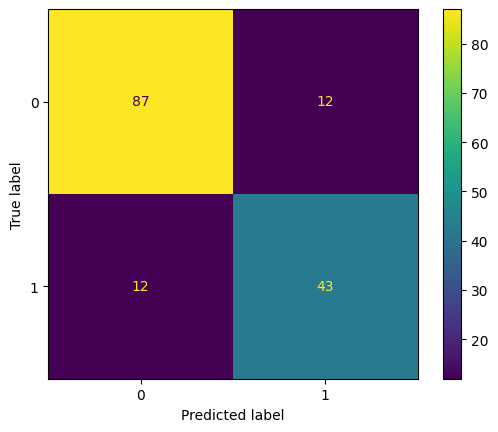

In [44]:
# GridSearch with a 10 fold cross-validation :
grid_svc=GridSearchCV(estimator=SVC(),param_grid={'C':np.arange(0,20,step=1),'kernel':['rbf','sigmoid'],'gamma':['auto','scale']},
                  scoring="accuracy",cv=10,verbose=1,refit=True)
grid_svc.fit(X_train_std,y_train)
print("Best parameters :",grid_svc.best_params_)

best_svc=grid_svc.best_score_
print("Best accuracy on train : {:.2%}".format(best_svc))

score_svc=grid_svc.score(X_test_std,y_test)
print("Accuracy on test : {:.2%}".format(score_svc))

# Confusion matrix :
y_pred=grid_svc.predict(X_test_std)
cm=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

mv_class_svm=cm[1,0]/(cm[1,0]+cm[1,1])
print("Error on class 1 : {:.2%}".format(mv_class_svm))
res_svm=precision_recall_fscore_support(y_test,y_pred,average='weighted')[0:3]

### Random Forest :

Fitting 5 folds for each of 104 candidates, totalling 520 fits
Best parameters : {'max_depth': np.int64(14), 'n_estimators': np.int64(70)}
Best accuracy on train : 88.93%
Accuracy on test : 87.01%
Error on class 1 : 16.36%


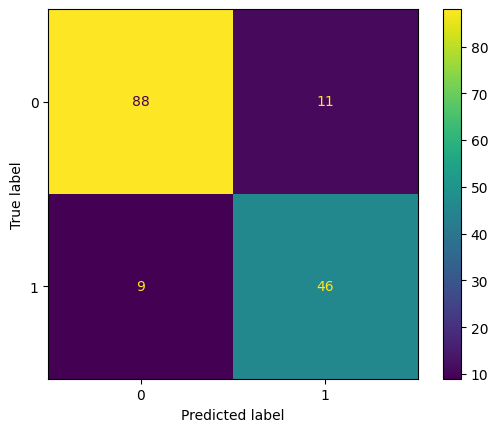

In [49]:
# GridSearch with a 10 fold cross-validation :
grid_rf=GridSearchCV(estimator=RandomForestClassifier(),param_grid={"n_estimators":np.arange(20,100,step=10),
                                                                    'max_depth':np.arange(2,15,step=1)}
                  ,scoring="accuracy",cv=5,verbose=1)
grid_rf.fit(X_train_std,y_train)
print("Best parameters :",grid_rf.best_params_)

best_RF=grid_rf.best_score_
print("Best accuracy on train : {:.2%}".format(best_RF))

score_RF=grid_rf.score(X_test_std,y_test)
print("Accuracy on test : {:.2%}".format(score_RF))

# Confusion matrix :
y_pred=grid_rf.predict(X_test_std)
cm=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
mv_class_rf=cm[1,0]/(cm[1,0]+cm[1,1])

print("Error on class 1 : {:.2%}".format(mv_class_rf))
res_rf=precision_recall_fscore_support(y_test,y_pred,average='weighted')[0:3]

### Gradient Boosting (XGBoost) :

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best parameters : {'learning_rate': 0.1, 'max_depth': np.int64(3), 'max_features': np.int64(6)}
Best accuracy on train : 90.88%
Accuracy on test : 88.31%
Error on class 1 : 14.55%


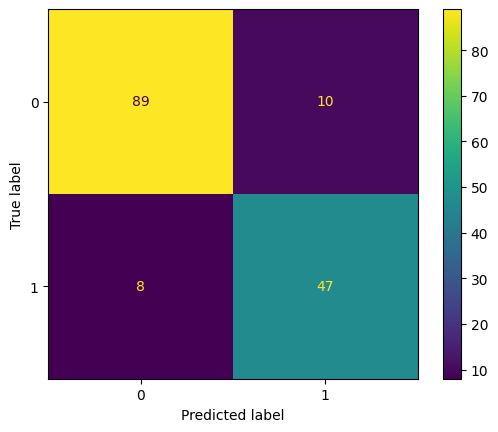

In [50]:
# GridSearch with a 10 fold cross-validation :
grid_gb=GridSearchCV(GradientBoostingClassifier(),param_grid={'learning_rate': [0.05, 0.1, 0.5],
                                                              'max_features': np.arange(1,10,step=1), 'max_depth': np.arange(1,5,step=1)},
                                                               cv=10, scoring='accuracy',verbose=1)
grid_gb.fit(X_train_std,y_train)
print("Best parameters :",grid_gb.best_params_)

best_gb=grid_gb.best_score_
print("Best accuracy on train : {:.2%}".format(best_gb))

score_gb=grid_gb.score(X_test_std,y_test)
print("Accuracy on test : {:.2%}".format(score_gb))

# Confusion matrix :
y_pred=grid_gb.predict(X_test_std)
cm=confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

mv_class_gb=cm[1,0]/(cm[1,0]+cm[1,1])
print("Error on class 1 : {:.2%}".format(mv_class_gb))
res_gb=precision_recall_fscore_support(y_test,y_pred,average='weighted')[0:3]

## Conclusion :

In [71]:
model_names = ["Baseline", "Logistic Regression", "KNN", "SVM", "Random Forest", "Gradient Boosting"]

# Accuracy :
fig = px.bar(x=model_names, y=np.array([score_baseline,score_knn,score_reg,score_svc,score_RF,score_gb]), title="Accuracy of the different model we tried", color=model_names, )
fig.show()

In [68]:
scores = [score_baseline, score_reg, score_knn, score_svc, score_RF, score_gb]
results = [
    [score_baseline, 0, 0, 0, 1], # Baseline
    [score_reg, *res_reg_log, mv_class_lr], # Logistic Regression
    [score_knn, *res_knn, mv_class_knn], # K-NN
    [score_svc, *res_svm, mv_class_svm], # SVM
    [score_RF, *res_rf, mv_class_rf], # Random Forest
    [score_gb, *res_gb, mv_class_gb] # Gradient Boosting
]

In [72]:
res = pd.DataFrame(results)
res.columns = ["Accuracy", "Precision", "Recall", "F1-Score", "Error on class 1"]
res.index = model_names
res.sort_values(by=["Accuracy", "Precision", "Recall", "F1-Score"], ascending=False)

,Accuracy,Precision,Recall,F1-Score,Error on class 1
Gradient Boosting,0.883117,0.884324,0.883117,0.883564,0.145455
Random Forest,0.870130,0.871431,0.870130,0.870627,0.163636
KNN,0.857143,0.856235,0.857143,0.856534,0.218182
SVM,0.844156,0.844156,0.844156,0.844156,0.218182
Logistic Regression,0.792208,0.788921,0.792208,0.789270,0.345455
Baseline,0.642857,0.000000,0.000000,0.000000,1.000000


<Axes: >

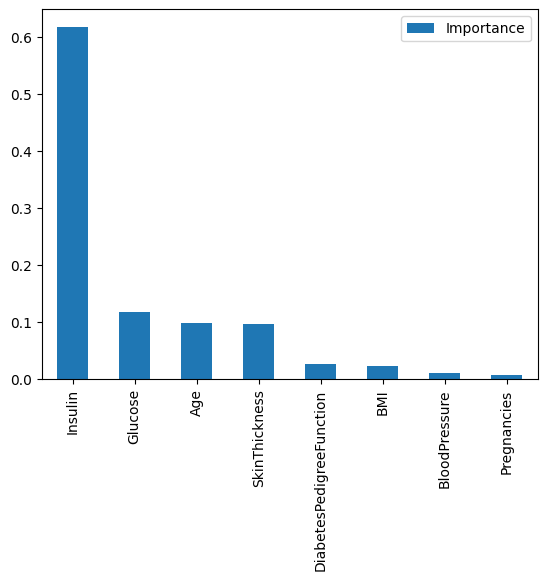

In [90]:
importance=pd.DataFrame(grid_gb.best_estimator_.feature_importances_)
importance.index=X.columns
importance.columns=["Importance"]
importance.sort_values(by="Importance",ascending=False,inplace=True)
importance.plot(kind="bar")

We can see that we have a relatively good accuracy in our models (88%) and even a good recall and error on class 1 which is very important in a case like this one where we have must make very few error in not detecting a possibly diabetic patient.

The best model is the Gradient Boosting one with : 88% accuracy, 88% Recall and 14% error on class 1.

We could have tried to tackle the imbalance in the dataset but seeing that we got a good recall overall it doesn't look necessary.

The most important feature in the process of predicting the outcome are Insulin level, Age and Glucose.